In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt


hhh


## Visualize the datasets

Plot the dust deposition rate of the empirical dataset in the measurement locations and the simulated data on the global grid.

In [20]:
df_empirical_Holocene = pd.read_csv("df_empirical_Holocene.csv")
df_empirical_LGM = pd.read_csv("df_empirical_LGM.csv")

In [21]:
world_map = gpd.read_file(geodatasets.get_path('naturalearth.land'))

In [94]:
def plot_dust_deposition_map(df, title, name_to_save, label_str='log_dep', measure_units='Dust flux log$_{10}$[g m$^{-2}$ a$^{-1}$]', limit_bar = 3.2):
    """Generate a map plot of dust deposition based on the provided dataframe.

    Parameters:
    - df (pandas DataFrame): The dataframe containing the dust deposition data.
    - title(str): The title to be displayed on the plot.
    - name_to_save (str): The filename to save the generated map plot.
    - label_str (str, optional): The column name in the dataframe to use for labeling the data on the plot. Defaults to 'log_dep'.
    - measure_units (str, optional): The units of measurement for the dust flux. Defaults to 'Dust flux log$_{10}$[g m$^{-2}$ a$^{-1}$]'.
    - limit_bar (float, optional): The limit value for the colorbar on the plot. Defaults to 3.2."""

    df_dust_geopandas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

    fig, ax = plt.subplots(figsize=(12, 10))

    # Set limits and ticks
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)
    ax.set_xticks(np.arange(-180, 181, 45))
    ax.set_yticks(np.arange(-90, 91, 30))

    # Plot world map
    world_map.boundary.plot(ax=ax, color='black', linewidth=0.8)

    # Plot the GeoDataFrame
    df_dust_geopandas.plot(column=label_str,
                           ax=ax,
                           legend=True,
                           legend_kwds={'label': measure_units, 'orientation': "horizontal"},
                           cmap='viridis',
                           vmin=-limit_bar,
                           vmax=limit_bar,
                           linewidth=0.005,
                           markersize=100)

    # Set labels and title
    ax.set(xlabel='Longitude', ylabel='Latitude', title=title)

    # Save and show the plot
    plt.savefig(f"{name_to_save}.pdf", bbox_inches='tight', dpi=600)
    plt.show()

    return
#CODIGO ENTREGADO POR CANVAS

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


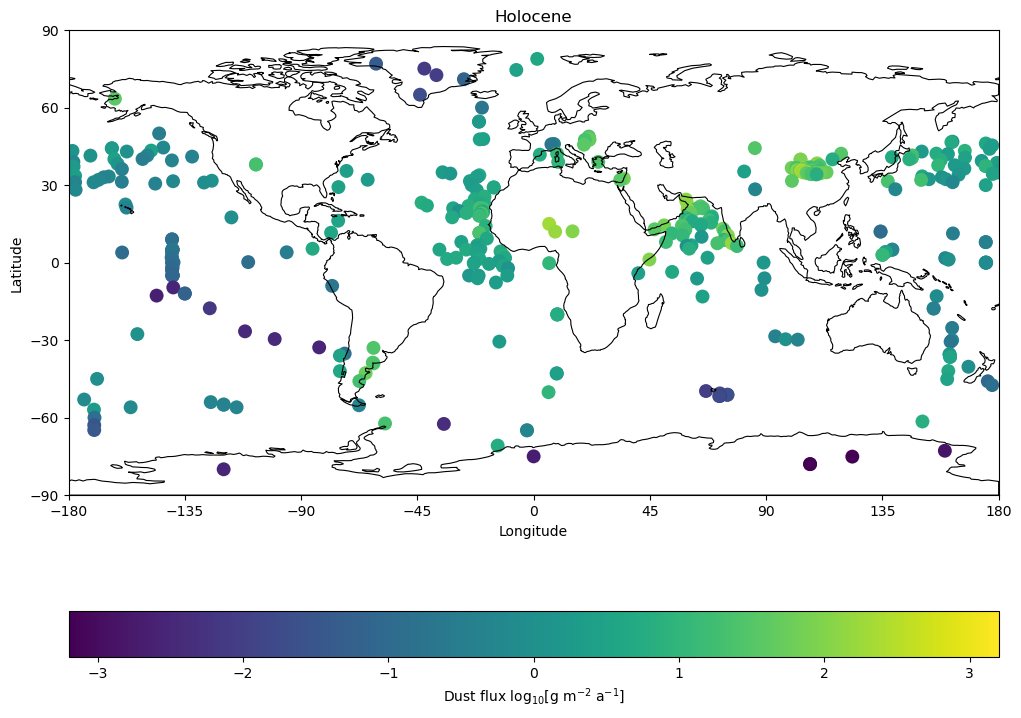

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


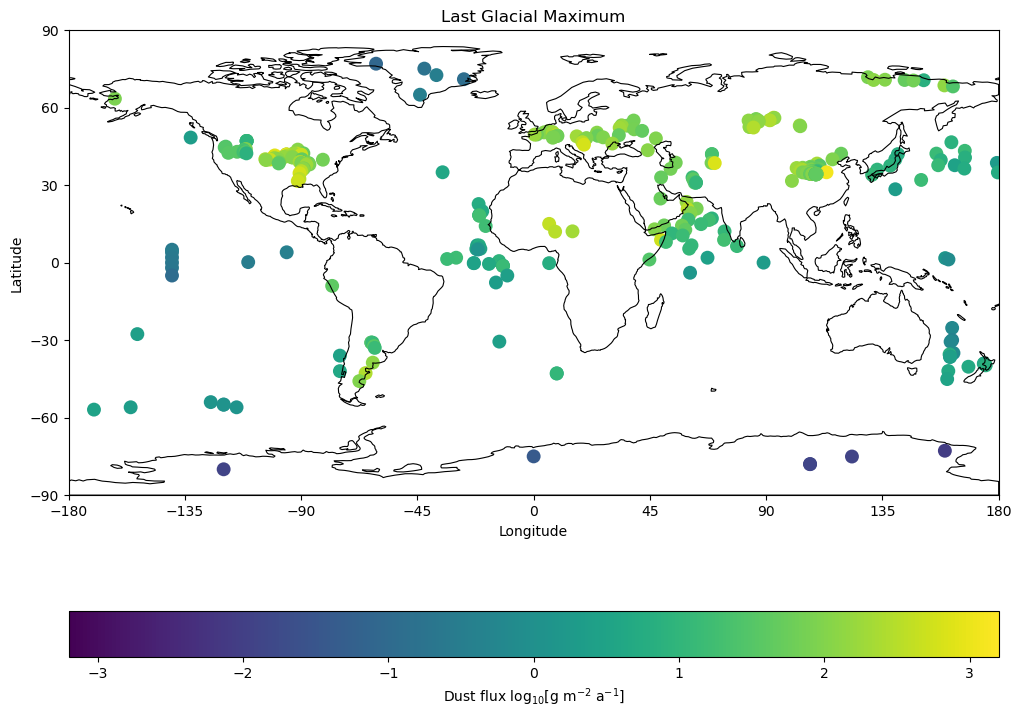

In [23]:
plot_dust_deposition_map(df=df_empirical_Holocene,
                         title='Holocene',
                         name_to_save='DATA_MAP_HOLOCENE')

plot_dust_deposition_map(df=df_empirical_LGM,
                         title='Last Glacial Maximum',
                         name_to_save='DATA_MAP_LGM')
#CODIGO ENTREGADO POR CANVAS

## Create and visualize the global grid

The global grid for the predictions consists of 3-degree spacing.

In [71]:
longitude_to_predict = np.linspace(-180, 180, 121)
latitude_to_predict = np.linspace(-90, 90, 61)

xx, yy = np.meshgrid(longitude_to_predict, latitude_to_predict)
XYpairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ])
df_gpd_global_grid = gpd.GeoDataFrame(geometry=gpd.points_from_xy(XYpairs[0], XYpairs[1]))
df_global_grid = pd.DataFrame({
    'lon': df_gpd_global_grid.geometry.x,
    'lat': df_gpd_global_grid.geometry.y
})
#CODIGO ENTREGADO POR CANVAS

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


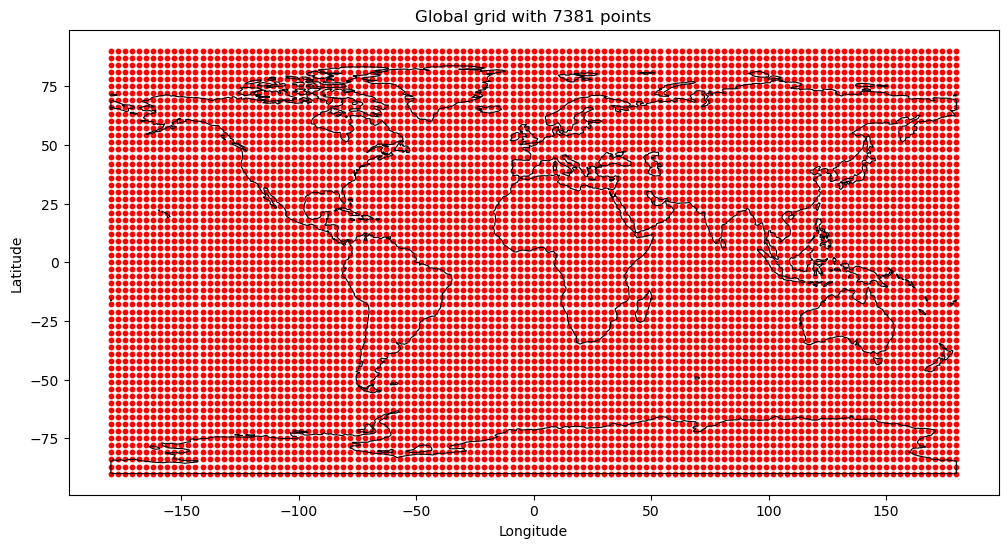

In [148]:
fig, ax = plt.subplots(figsize=(12,10))
world_map.boundary.plot(ax=ax, color='black', linewidth=0.8)
df_gpd_global_grid.plot(ax=ax, color='red', markersize=10, marker ='o')

ax.set(xlabel='Longitude', ylabel='Latitude',
       title=f'Global grid with {df_gpd_global_grid.shape[0]} points')
plt.show()
#CODIGO ENTREGADO POR CANVAS

## Analyse global deposition rate with nearest neighbours

The dust deposition rate will be estimated by averaging the values of the $k$ nearest neigbours.

In [73]:
def distance_euclidean(x, y):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    x,y : Iterable
        Vectors for the 2D location of the two points.
    """
    distance = np.sqrt( (x[0] - y[0])**2 + (x[1] - y[1])**2)
    return distance
#CODIGO ENTREGADO POR CANVAS

In [74]:



def distance_geodesic(x, y):
    """
    Calcula la distancia geodésica entre dos puntos en la superficie de una esfera.

    Parámetros:
    x, y: Iterable
        Vectores para la ubicación 2D de los dos puntos.
        Cada vector debe contener las coordenadas de latitud y longitud en grados decimales.

    Retorna la distancia en kilómetros.
    """
   
    return
#CODIGO ENTREGADO_POR CANVAS

In [75]:
def nearest_neighbour_estimation(df, x, k, dist):
    """
    Perform a k nearest neighbour estimation.

    Parameters:
    df : pandas.DataFrame
        The database.
    x : Iterable
        Location for the estimation.
    k : int
        The number of neighbours to consider.
    dist : str
        The type of distance definition.
    """
    
    if dist == "geodesic":
        distance_fun = distance_geodesic
    else:
        distance_fun = distance_euclidean
    
    distances = np.repeat(np.inf, len(df))
    for index, row in df.iterrows():
        distances[index] = distance_fun(x, (row["lon"], row["lat"]))
    
    sorted_indices = np.argsort(distances)
    nearest_points = sorted_indices[:k]
    
    values_neighbours = df.loc[nearest_points, "log_dep"]
    estimation = np.average(values_neighbours)
    
    return estimation
#CODIGO ENTREGADO POR CANVAS

In [76]:
# Choose the number of neighbours to include in the estimation
n_neighbours = 5
#CODIGO ENTREGADO POR CANVAS

In [149]:
estimations_holocene = np.repeat(np.inf, len(df_global_grid))
estimations_lgm = np.repeat(np.inf, len(df_global_grid))

for index, row in df_global_grid.iterrows():
    point_for_estimation = (row["lon"], row["lat"])
    estimations_holocene[index] = nearest_neighbour_estimation(df_empirical_Holocene, point_for_estimation, n_neighbours, dist='euclidean')
    estimations_lgm[index] = nearest_neighbour_estimation(df_empirical_LGM, point_for_estimation, n_neighbours, dist='euclidean')

df_global_grid["est_hol"] = estimations_holocene
df_global_grid["est_lgm"] = estimations_lgm
#CODIGO ENTREGADO POR CANVAS 

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


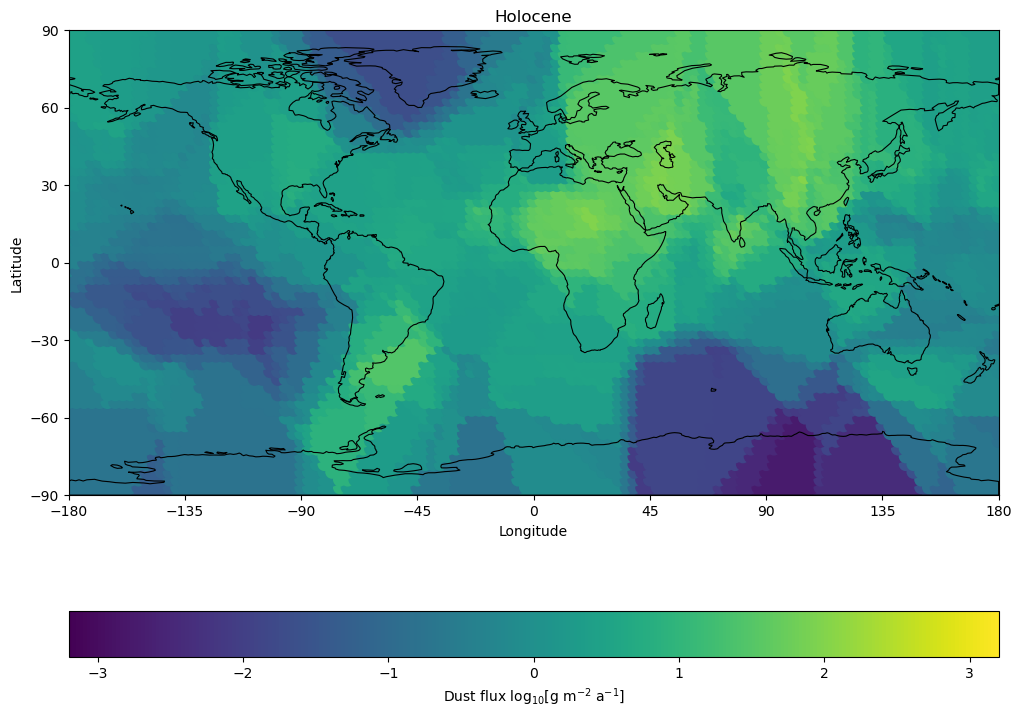

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


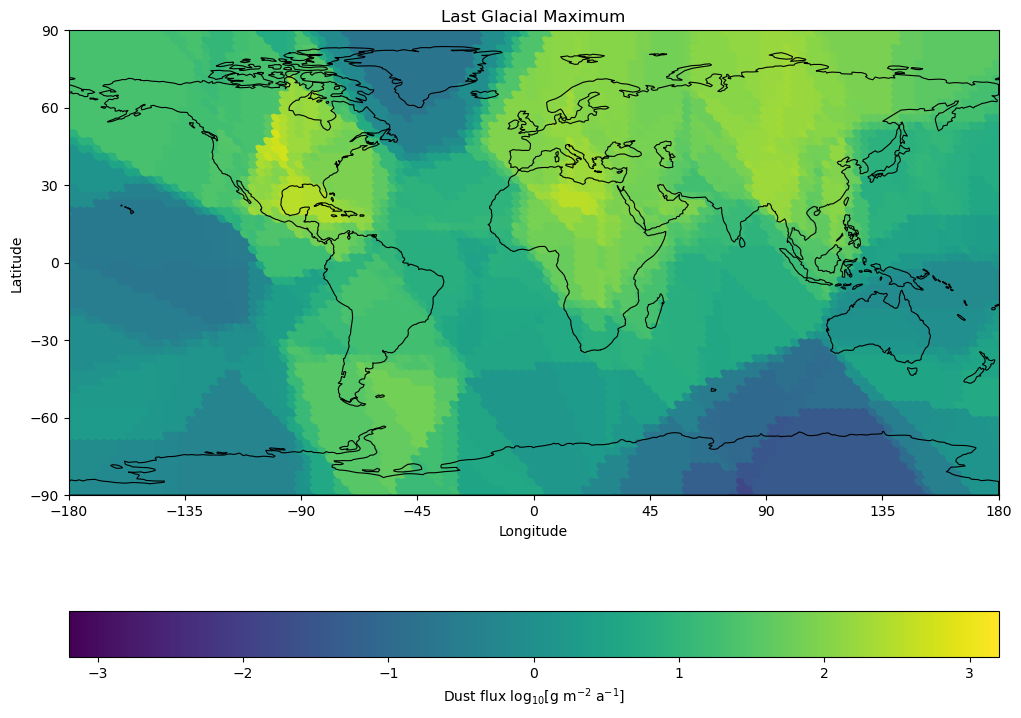

In [78]:
plot_dust_deposition_map(df=df_global_grid,
                         title='Holocene',
                         name_to_save='ESTIMATION_MAP_HOLOCENE',
                         label_str='est_hol')

plot_dust_deposition_map(df=df_global_grid,
                         title='Last Glacial Maximum',
                         name_to_save='ESTIMATION_MAP_LGM',
                         label_str='est_lgm')
#CODIGO ENTREGADO POR CANVAS

Definimos la funcion de la distancia geodésica

In [79]:
def distance_geodesic(x, y):
    lat1, lon1 = np.radians(x)
    lat2, lon2 = np.radians(y)
    distance = 6371.0 * np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1))  
    return distance


Aplicamos la funcion de vecinos para la distancia geodésica

In [88]:
longitude_to_predict = np.linspace(-180, 180, 121)
latitude_to_predict = np.linspace(-90, 90, 61)

xx, yy = np.meshgrid(longitude_to_predict, latitude_to_predict)
XYpairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ])
df_gpd_global_grid = gpd.GeoDataFrame(geometry=gpd.points_from_xy(XYpairs[0], XYpairs[1]))
df_global_grid_2 = pd.DataFrame({
    'lon': df_gpd_global_grid.geometry.x,
    'lat': df_gpd_global_grid.geometry.y
})

In [151]:
estimations_holocene = np.repeat(np.inf, len(df_global_grid))
estimations_lgm = np.repeat(np.inf, len(df_global_grid))

for index, row in df_global_grid.iterrows():
    point_for_estimation = (row["lon"], row["lat"])
    estimations_holocene[index] = nearest_neighbour_estimation(df_empirical_Holocene, point_for_estimation, n_neighbours, dist='geodesic')
    estimations_lgm[index] = nearest_neighbour_estimation(df_empirical_LGM, point_for_estimation, n_neighbours, dist='geodesic')

df_global_grid_2["est_hol"] = estimations_holocene
df_global_grid_2["est_lgm"] = estimations_lgm
#CODIGO ENTREGADO POR CANVAS

Visualizamos los resultados obtenidos

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


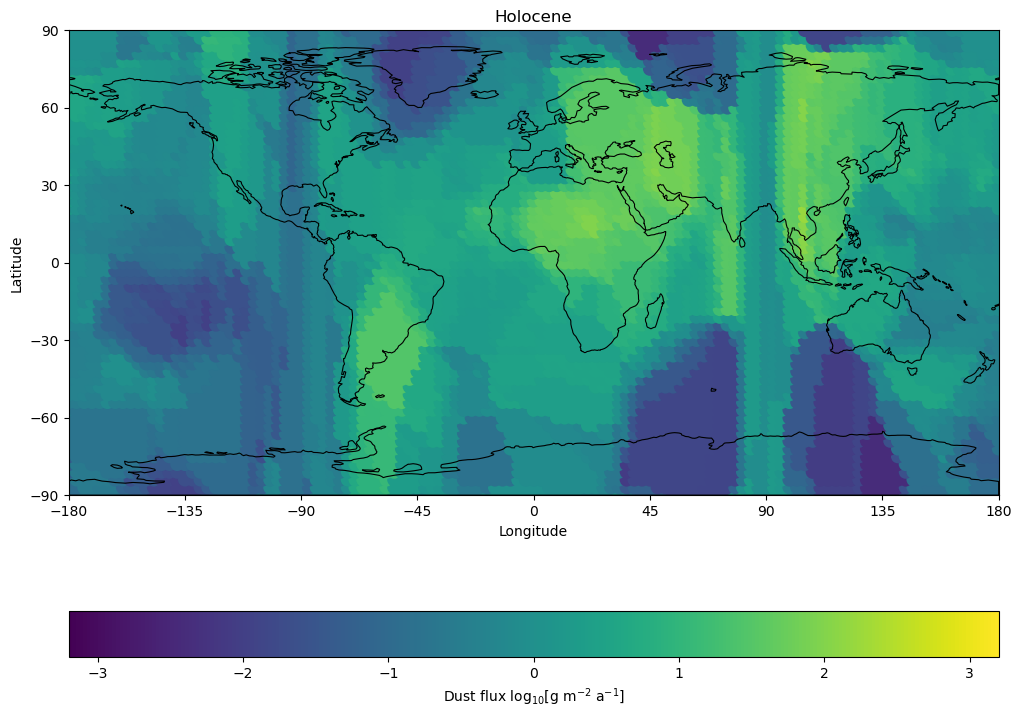

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


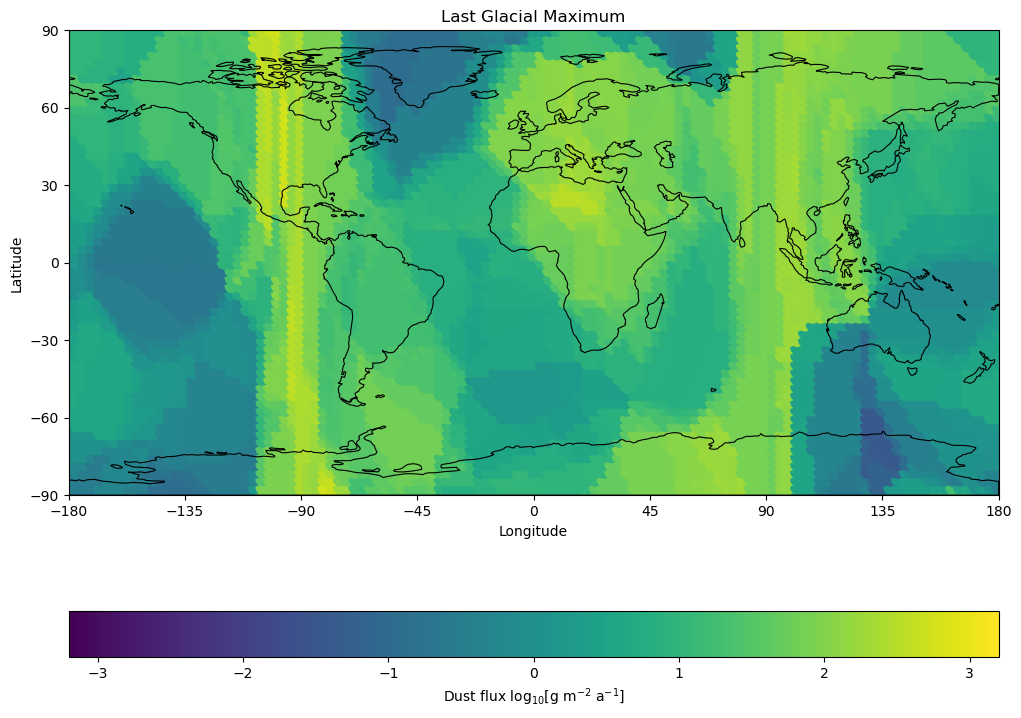

In [95]:
plot_dust_deposition_map(df=df_global_grid_2,
                         title='Holocene',
                         name_to_save='ESTIMATION_MAP_HOLOCENE',
                         label_str='est_hol')

plot_dust_deposition_map(df=df_global_grid_2,
                         title='Last Glacial Maximum',
                         name_to_save='ESTIMATION_MAP_LGM',
                         label_str='est_lgm')
#CODIGO ENTREGADO POR CANVAS

Calculamos la diferencia entre las distancias y visualizamos el resultado 

In [139]:

euclidean_values = df_global_grid['est_hol'].values
geodesic_values = df_global_grid_2['est_hol'].values
difference = np.abs(euclidean_values - geodesic_values)
print("Diferencia entre la distancia euclidiana y geodesica de holoceno")
print(difference)

Diferencia entre la distancia euclidiana y geodesica de holoceno
[0.20723391 0.20723391 0.12560785 ... 0.38862459 0.38862459 0.38862459]


In [152]:
euclidean_values = df_global_grid['est_lgm'].values
geodesic_values = df_global_grid_2['est_lgm'].values
difference = np.abs(euclidean_values - geodesic_values)
print("Diferencia entre la distancia euclidiana y geodesica de holoceno")
print(difference)

Diferencia entre la distancia euclidiana y geodesica de holoceno
[0.44765489 0.42028632 0.35653466 ... 0.61803546 0.59534679 0.59534679]


¿Por qué las diferencias son m ́as grandes en una parte que otra
parte del mundo?

En el caso de la distancia geodésica esto ocurre por la curvatura de la Tierra , debido a que en algunas partes del plante es más pronunciada el calculo de su distancia se ve afectado por esta variable , en cambio la distancia euclideana no considera este factor

¿Cuál método es más fidedigno en los polos sur y norte?

En el caso de los polor suy y norte , la distancia geodésica se puede considerar más precisa.Esto debido a que la distancia geodésica tiene en cuenta la curvatura de la Tierra y en el caso de los polos se presentan deformaciones mas pronunciadas en los mapas planos.
En cambio el método euclideano calcula la distancia recta es un espacio plano , por lo que es más probable que presente errores de calculo debido a la deformación de la proyección.

¿Cuál método es más fidedigno en longitud 180◦?

En este caso la distancia geodésica es preferible , ya que , tiene en cuenta la curvatura de la tierra 

Visualizamos para el caso de Holoceno

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


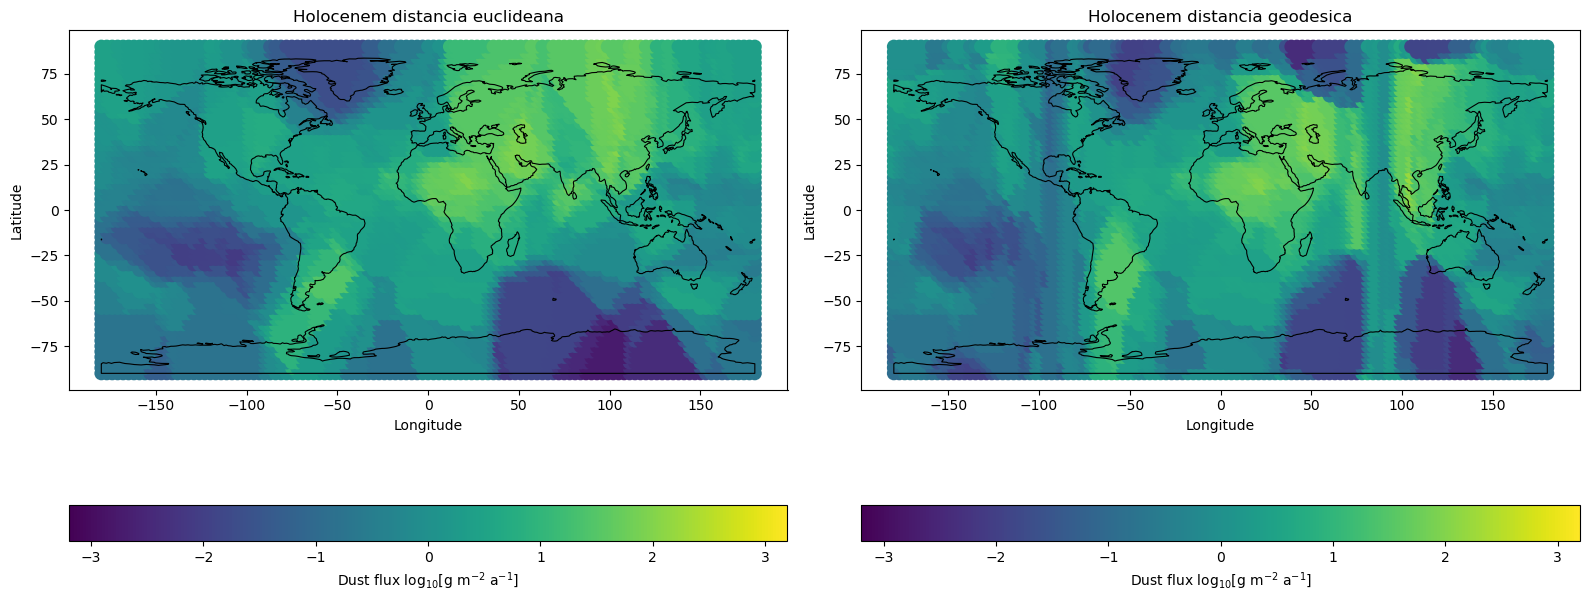

In [99]:


def plot_dust_deposition_map(ax, df, title, label_str='log_dep', measure_units='Dust flux log$_{10}$[g m$^{-2}$ a$^{-1}$]', limit_bar=3.2):
    """Generate a map plot of dust deposition based on the provided dataframe.

    Parameters:
    - ax (matplotlib axis): The axis object to plot on.
    - df (pandas DataFrame): The dataframe containing the dust deposition data.
    - title(str): The title to be displayed on the plot.
    - label_str (str, optional): The column name in the dataframe to use for labeling the data on the plot. Defaults to 'log_dep'.
    - measure_units (str, optional): The units of measurement for the dust flux. Defaults to 'Dust flux log$_{10}$[g m$^{-2}$ a$^{-1}$]'.
    - limit_bar (float, optional): The limit value for the colorbar on the plot. Defaults to 3.2."""

    df_dust_geopandas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

    # Plot world map
    world_map.boundary.plot(ax=ax, color='black', linewidth=0.8)

    # Plot the GeoDataFrame
    df_dust_geopandas.plot(column=label_str,
                           ax=ax,
                           legend=True,
                           legend_kwds={'label': measure_units, 'orientation': "horizontal"},
                           cmap='viridis',
                           vmin=-limit_bar,
                           vmax=limit_bar,
                           linewidth=0.005,
                           markersize=100)

    # Set labels and title
    ax.set(xlabel='Longitude', ylabel='Latitude', title=title)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Call the function for Holocene map
plot_dust_deposition_map(ax=axes[0],
                         df=df_global_grid,
                         title='Holocenem distancia euclideana',
                         label_str='est_hol')

# Call the function for Last Glacial Maximum map
plot_dust_deposition_map(ax=axes[1],
                         df=df_global_grid_2,
                         title='Holocenem distancia geodesica',
                         label_str='est_hol')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#ESTE CODIGO FUE GENERADO POR CHATGPT

Visualizamos las diferencias para LGM

/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/isidoraguinez/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


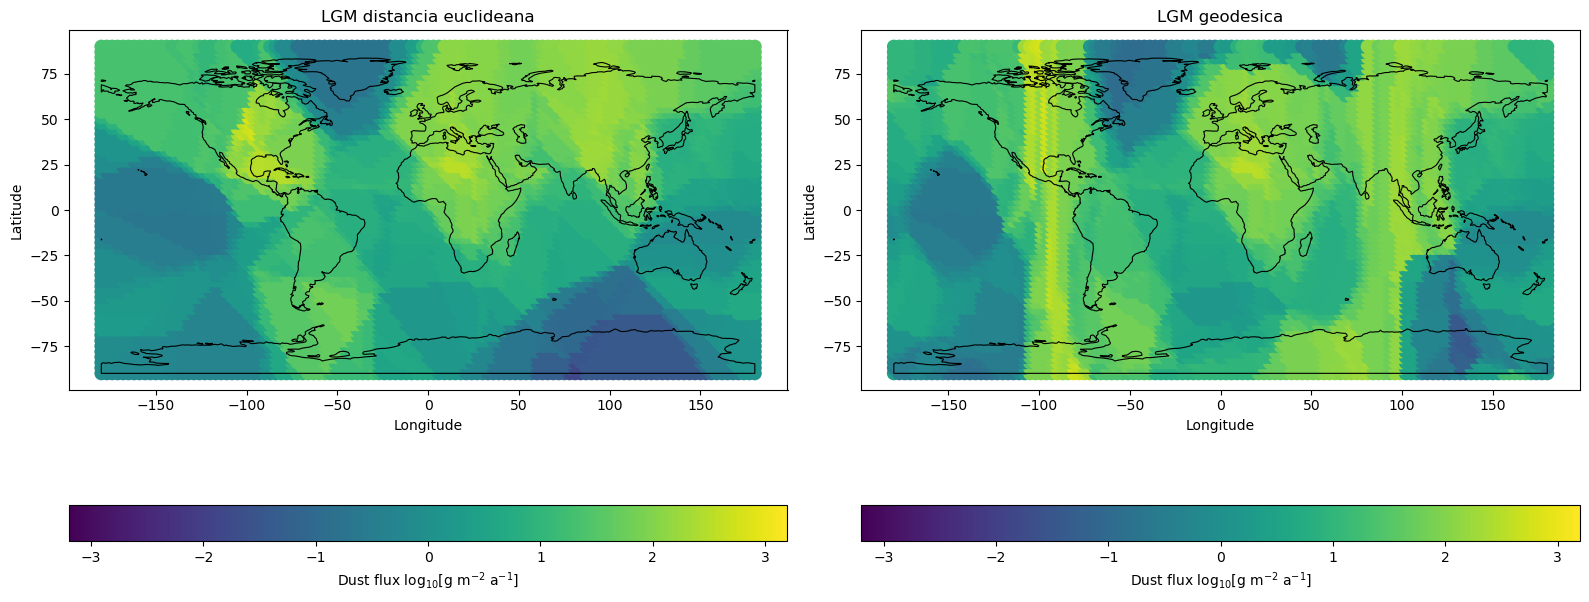

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_dust_deposition_map(ax=axes[0],
                         df=df_global_grid,
                         title='LGM distancia euclideana',
                         label_str='est_lgm')

# Call the function for Last Glacial Maximum map
plot_dust_deposition_map(ax=axes[1],
                         df=df_global_grid_2,
                         title='LGM geodesica',
                         label_str='est_lgm')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#ESTE CODIGO FUE GENERADO POR CHATGPT

Para ver  como elegir el número de vecinos cercanos , realizaremos una validacion cruzada donde trendremos una lista de numeros de vecinos que nos gustaría probar 